 
 ## <font color="1497d4">  **Statistical Analysis for Accented Speech recognition**</font>

 
 
<font color=white> **Mozilla Common Voice 10.0. dataset**</font> 

## <font color="1497d4">  **Analyze results from Carlos’ model**</font>
 
<font color=white> **Setup dev environment:**</font> 


 


###<font color="1497d4"> Import the necessary python libraries:</font>


The next step is to import the required python libraries:
*   NumPy:   for scientific computing.
*   Matplotlib: a plotting library for Python.
*   Matplotlib.pyplot:  a group of functions that allow matplotlib to work like MATLAB.
*   Pandas: used for data science/data analysis.







In [151]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import math Library   -- # Check whether some values are NaN
import math

In [152]:
## exp
import seaborn as sns
import matplotlib.pyplot as plt

tips=sns.load_dataset('tips')
print(tips)
print('*'*50)
print(np.mean(tips['total_bill']))

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
**************************************************
19.78594262295082


###<font color="1497d4"> Importing the Dataset:</font>


The next step is to import the dataset file by either uploading the file on Google Colab or mounting the google drive and empowering Colab to access all files(dataset)on it. Then to copy the dataset to our colab runtime files.

In [153]:
#Mount drive


In [154]:
# Import the dataset file by method1 
# from google.colab import files
# uploaded = files.upload()

! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/results.json   /content/results.json

# copy the expermintations files to deal with them
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_at.txt /content/test_at.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ca.txt /content/test_ca.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ch.txt /content/test_ch.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de_al.txt /content/test_de_al.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de_ni.txt /content/test_de_ni.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de.txt /content/test_de.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_fr.txt /content/test_fr.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_gb.txt /content/test_gb.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_it.txt /content/test_it.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ru.txt /content/test_ru.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_us.txt /content/test_us.txt

# copy the expermintations files from Mozilla Commen Voice v 10 to deal with them

! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/cv-corpus04072022/de/validated.tsv /content/validated.tsv


###<font color="1497d4"> Reading the Dataset:</font>
**The following Method takes the dataset filename and loads it into data frame called dataset.**




In [155]:
#read a TSV file/Dataset

import pandas as pd
dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t')
dataset_validated_tsv

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
0,0052c07533a6976233ad5926d950b523002c4d8cdd9ae8...,common_voice_de_17922420.mp3,Zieht euch bitte draußen die Schuhe aus.,2,0,NaN,NaN,NaN,de,NaN
1,00aa59ff387a07bf1c056cccd6715b3c764201f51092c3...,common_voice_de_27060918.mp3,Es gibt auch mehrere Campingplätze.,2,0,NaN,NaN,NaN,de,NaN
2,02274179aeff73e1e7897ed6fec2355af2cd6e5410e3c6...,common_voice_de_19728810.mp3,Es kommt zum Showdown in Gstaad.,2,1,NaN,NaN,NaN,de,NaN
3,02650022b4a4266846057d97ae4d81da8af9e09e2a4bb1...,common_voice_de_19156087.mp3,Ihre Fotostrecken erschienen in Modemagazinen ...,3,1,NaN,NaN,NaN,de,NaN
4,02786062ec85038ffeed4c38ed7b31d3aa8e6439817fb1...,common_voice_de_27395829.mp3,"Aber weißt du, wer den Stein wirklich ins Roll...",2,0,NaN,NaN,NaN,de,NaN
...,...,...,...,...,...,...,...,...,...,...
793063,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911655.mp3,Gegen Bezahlung posierte sie für Fotos und gab...,3,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN
793064,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911638.mp3,Zur Folgesaison wechselte er fest in die Niede...,6,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN
793065,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911641.mp3,Er ist auf die Stile Schmetterling und Lagen s...,3,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN
793066,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911661.mp3,Vieles wurde exportiert.,6,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN


In [156]:
# read a tsv file as a file
# import csv
# with open("validated.tsv") as file:
#   tsv_file = csv.reader(file, delimiter="\t")
#   for line in tsv_file:
#     print(line)

#dataset= pd.read_excel('DB101_gaming_video_quality.xlsx')    
dataset_results_json= pd.read_json ('results.json')   
print(dataset_results_json)
print(" **************************************************")
print("The dataset_results_json's Shape of test_at.txt",dataset_results_json.head())
print(" **************************************************")
print("The dataset_results_json's Shape of test_at.txt",dataset_results_json.shape)

                                                                                          test_at.txt  \
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-...  {'reference': 'er ist nach eustache de saint p...   
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-...  {'reference': 'eine erste kleinformatige vorst...   
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-...  {'reference': 'er blieb ohne erfolg und lag in...   
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-...  {'reference': 'mein garten ist teil eines klei...   
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-...  {'reference': 'was habe ich damals für einen u...   
...                                                                                               ...   
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-...                                                NaN   
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-...                                                NaN   
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-...     

In [157]:
dataset_results_json.head()

,test_at.txt,test_gb.txt,test_it.txt,test_de_al.txt,test_fr.txt,test_de_ni.txt,test_ch.txt,test_de.txt,test_us.txt,test_ca.txt,test_ru.txt
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_31449916.mp3,{'reference': 'er ist nach eustache de saint p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_19730674.mp3,{'reference': 'eine erste kleinformatige vorst...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_19703888.mp3,{'reference': 'er blieb ohne erfolg und lag in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_18507972.mp3,{'reference': 'mein garten ist teil eines klei...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_24131267.mp3,{'reference': 'was habe ich damals für einen u...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:

print("The dataset_results_json's columns",dataset_results_json.columns)
print(" **************************************************")
print("The dataset_results_json's Shape ",dataset_results_json.shape)

The dataset_results_json's columns Index(['test_at.txt', 'test_gb.txt', 'test_it.txt', 'test_de_al.txt',
       'test_fr.txt', 'test_de_ni.txt', 'test_ch.txt', 'test_de.txt',
       'test_us.txt', 'test_ca.txt', 'test_ru.txt'],
      dtype='object')
 **************************************************
The dataset_results_json's Shape  (49230, 11)


In [159]:
dataset_results_json.tail()

,test_at.txt,test_gb.txt,test_it.txt,test_de_al.txt,test_fr.txt,test_de_ni.txt,test_ch.txt,test_de.txt,test_us.txt,test_ca.txt,test_ru.txt
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_17645865.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'reference': 'sie kramte in ihrer tasche', 'h..."
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_17645866.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'reference': 'libreville ist die hauptstadt v...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_18862913.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'reference': 'das ramponierte image haben sie...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_18862914.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'reference': 'er macht einen unterforderten e...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_18862915.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'reference': 'mit der kippe sind sie für ihr ...


In [160]:
dataset_results_json.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49230 entries, /ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_31449916.mp3 to /ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_18862915.mp3
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   test_at.txt     4495 non-null   object
 1   test_gb.txt     148 non-null    object
 2   test_it.txt     978 non-null    object
 3   test_de_al.txt  724 non-null    object
 4   test_fr.txt     1415 non-null   object
 5   test_de_ni.txt  671 non-null    object
 6   test_ch.txt     2908 non-null   object
 7   test_de.txt     36504 non-null  object
 8   test_us.txt     291 non-null    object
 9   test_ca.txt     123 non-null    object
 10  test_ru.txt     973 non-null    object
dtypes: object(11)
memory usage: 4.5+ MB


In [161]:
#Count non-NA cells for each column or row.

import pandas as pd
datasetcount= pd.read_json ('results.json')   
print("*************************************" )
print(datasetcount.count())
print("*************************************" )
s=pd.Series(datasetcount.any)
print(s.count())
datasetcount.drop(datasetcount[(datasetcount['test_at.txt'].isna())].index, inplace=True)
print("*************************************" )
print(datasetcount.count()) #Count non-NA cells for each column or row.
print("*************************************" )
s=pd.Series(datasetcount.any)
print("*************************************" )
print(s.count())
#***************************************

'''
delayed_flights = data[data['delayed'] == True] #filter to only rows where delayer == True
delayed_flights['unique_carrier'].value_counts() #count the number of rows for each carrier
'''

*************************************
test_at.txt        4495
test_gb.txt         148
test_it.txt         978
test_de_al.txt      724
test_fr.txt        1415
test_de_ni.txt      671
test_ch.txt        2908
test_de.txt       36504
test_us.txt         291
test_ca.txt         123
test_ru.txt         973
dtype: int64
*************************************
1
*************************************
test_at.txt       4495
test_gb.txt          0
test_it.txt          0
test_de_al.txt       0
test_fr.txt          0
test_de_ni.txt       0
test_ch.txt          0
test_de.txt          0
test_us.txt          0
test_ca.txt          0
test_ru.txt          0
dtype: int64
*************************************
*************************************
1


"\ndelayed_flights = data[data['delayed'] == True] #filter to only rows where delayer == True\ndelayed_flights['unique_carrier'].value_counts() #count the number of rows for each carrier\n"

In [162]:
# How do I replace NaN with 0 in Python?
# Replace NaN Values with Zeros in Pandas DataFrame

# (1) For a single column using Pandas: dataset_test_at['DataFrame Column'] = dataset_test_at['DataFrame Column'].fillna(0)
# (2) For a single column using NumPy: dataset_test_at['DataFrame Column'] = dataset_test_at['DataFrame Column'].replace(np.nan, 0)
# (3) For an entire DataFrame using Pandas: dataset_test_at.fillna(0)

#By default, dropna() will drop all rows in which any null value is present:
# dataset_test_at.dropna()
#***************************************************
# Operating on Null Values
# As we have seen, Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:

# isnull(): generate a boolean mask indicating missing values
# notnull(): opposite of isnull()
# dropna(): return a filtered version of the data
# fillna(): return a copy of the data with missing values filled or imputed
# We will finish this section with a brief discussion and demonstration of these routines:
#*********************************************************


#https://www.oreilly.com/content/handling-missing-data/

###<font color="1497d4">The descriptive statistics and computational methods discussed in the data structure overview are all written to account for missing data. </font>
**For example:**
*   When countming data, NA (missing) values will be treated as zero.
*   If the data are all NA, the result will be 0.
*   Cumulative methods like cumcount() and cumprod() ignore NA values by default, but preserve them in the resulting arrays. To override this behaviour and include NA values, use skipna=False.

http://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#experimental-na-scalar-to-denote-missing-values

In [163]:
# covert the NaN Values to 0
import pandas as pd
dataset_results_json= pd.read_json ('results.json')   
dataset_results_json = dataset_results_json.fillna('0') # replace missing values with '' 
pd.options.mode.use_inf_as_na = True
#dataset.plot()
#sns.displot(dataset_results_json,y="test_at.txt",x="test_gp.txt")
dataset_results_json

,test_at.txt,test_gb.txt,test_it.txt,test_de_al.txt,test_fr.txt,test_de_ni.txt,test_ch.txt,test_de.txt,test_us.txt,test_ca.txt,test_ru.txt
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_31449916.mp3,{'reference': 'er ist nach eustache de saint p...,0,0,0,0,0,0,0,0,0,0
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_19730674.mp3,{'reference': 'eine erste kleinformatige vorst...,0,0,0,0,0,0,0,0,0,0
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_19703888.mp3,{'reference': 'er blieb ohne erfolg und lag in...,0,0,0,0,0,0,0,0,0,0
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_18507972.mp3,{'reference': 'mein garten ist teil eines klei...,0,0,0,0,0,0,0,0,0,0
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_24131267.mp3,{'reference': 'was habe ich damals für einen u...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_17645865.mp3,0,0,0,0,0,0,0,0,0,0,"{'reference': 'sie kramte in ihrer tasche', 'h..."
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_17645866.mp3,0,0,0,0,0,0,0,0,0,0,{'reference': 'libreville ist die hauptstadt v...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_18862913.mp3,0,0,0,0,0,0,0,0,0,0,{'reference': 'das ramponierte image haben sie...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_18862914.mp3,0,0,0,0,0,0,0,0,0,0,{'reference': 'er macht einen unterforderten e...


###<font color="1497d4"> Cleaning our dataset</font>

We have 49230  rows in our dataset. Consequently, we will delete the rows which do not meet the conditions (Values range). otherwise it changed normaly with the mean of the field in the small dataset.
After deleting the rows which have missing data. We relize that the new number 4495 rows. 

In [164]:
 
# Check the initial shape of the DataFrame
# Delete rows where case numbers are NaN
# This deletion is completed by "selecting" rows where case numbers are not zero
# (dataset['test_at.txt'].isna())|

#dataset.drop(dataset[(dataset['test_gb.txt'].isna())|(dataset['test_it.txt'].isna())|(dataset['test_de_al.txt'] .isna())|(dataset['test_fr.txt'].isna())|(dataset['test_de_ni.txt'] .isna())|(dataset['test_ch.txt'].isna())|(dataset['test_de.txt'].isna())|(dataset['test_us.txt'].isna())|(dataset['test_ca.txt'].isna())|(dataset['test_ru.txt'].isna())].index, inplace=True)

#dataset.drop(dataset[(dataset['test_gb.txt'].isna())|(dataset['test_it.txt'].isna())|(dataset['test_de_al.txt'] .isna())|(dataset['test_fr.txt'].isna())|(dataset['test_de_ni.txt'] .isna())|(dataset['test_ch.txt'].isna())|(dataset['test_de.txt'].isna())|(dataset['test_us.txt'].isna())|(dataset['test_ca.txt'].isna())|(dataset['test_ru.txt'].isna())].index, inplace=True)
dataset_at= pd.read_json ('results.json')   
dataset_at.drop(dataset_at[(dataset_at['test_at.txt'].isna())].index, inplace=True)
# print(" **************************************************")
# print("The dataset of test_at.txt Values"," **************************************************",dataset_at.head())
# print(" **************************************************")
# print("The dataset's Shape of test_at.txt",dataset_at.shape)
dataset_at.head()
dataset_at['test_at.txt']

/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_31449916.mp3    {'reference': 'er ist nach eustache de saint p...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_19730674.mp3    {'reference': 'eine erste kleinformatige vorst...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_19703888.mp3    {'reference': 'er blieb ohne erfolg und lag in...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_18507972.mp3    {'reference': 'mein garten ist teil eines klei...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_24131267.mp3    {'reference': 'was habe ich damals für einen u...
                                                                                                                         ...                        
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_23706817.mp3    {'refer

In [165]:
# delete the NaN Values from showing

dataset_results_json= pd.read_json ('results.json')   
dataset_results_json.drop(dataset_results_json[(dataset_results_json['test_at.txt'].isna())].index, inplace=True)
print(dataset_results_json["test_at.txt"])
print(" **************************************************")
print(dataset_results_json["test_at.txt"])

# print(dataset_at)

/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_31449916.mp3    {'reference': 'er ist nach eustache de saint p...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_19730674.mp3    {'reference': 'eine erste kleinformatige vorst...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_19703888.mp3    {'reference': 'er blieb ohne erfolg und lag in...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_18507972.mp3    {'reference': 'mein garten ist teil eines klei...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_24131267.mp3    {'reference': 'was habe ich damals für einen u...
                                                                                                                         ...                        
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_23706817.mp3    {'refer

###<font color="1497d4"> **You can find the test data, split by accent, in the data zip. The results are also within that zip file, named results.json. Here are some numbers and plots that we would like to have.**</font>

1.   **Duration distribution of audiofiles per speaker's accent, gender and age group, both as a plot and in terms of mean and variance.**
2.   **WER distribution per speaker's accent, gender, age group 
and duration, both as a plot and in terms of mean and variance.**
 


#### **Duration distribution of audiofiles per speaker's accent ,both as a plot and in terms of mean and variance.**

In [166]:
# read a TSV file/Dataset
# Duration distribution of audiofiles per speaker's accent

! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/cv-corpus04072022/de/validated.tsv /content/validated.tsv


#,y="speaker's accent",x="Duration distribution"
import pandas as pd
tsv_data = pd.read_csv('validated.tsv', sep='\t')
tsv_data.drop(tsv_data[(tsv_data['accents'].isna())].index, inplace=True)
tsv_data
print('*******************print Labels************************')

for label, content in tsv_data.items():
    print(f'label: {label}')
    #print(f'content: {content}', sep='\n')

print('*********************print Contents**********************')

for label, content in tsv_data.items():
    #print(f'label: {label}')
    print(f'content: {content}', sep='\n')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


*******************print Labels************************
label: client_id
label: path
label: sentence
label: up_votes
label: down_votes
label: age
label: gender
label: accents
label: locale
label: segment
*********************print Contents**********************
content: 6         03ac3eb87717f430b8a64228e61b5829cf6187f790c0fd...
21        0b8442069d5bdd1f2a891edc5cae7c92471e35742da54a...
26        0df96a055c391517acf584f64f74df3e5356de0c14a6c8...
45        1aabab5972b13f76cd0ae98088be9d79c3bfbb30fd60a3...
51        1e44e03d919c81cb3b1e8a1c5d494e864607631e690d83...
                                ...                        
793063    372293e65cdab88771e028a4351651ab2eff64438ddafc...
793064    372293e65cdab88771e028a4351651ab2eff64438ddafc...
793065    372293e65cdab88771e028a4351651ab2eff64438ddafc...
793066    372293e65cdab88771e028a4351651ab2eff64438ddafc...
793067    372293e65cdab88771e028a4351651ab2eff64438ddafc...
Name: client_id, Length: 539234, dtype: object
content: 6         com

In [167]:

# read the TSV file/Dataset test_at.txt
# Duration distribution of audiofiles per speaker's accent
dataset_test_at = pd.read_csv('test_at.txt', header=None, names=['audio_filepath','text','duration'], sep='\t')
#dataset_test_at = pd.read_csv('test_at.txt')
print('*******************************************')
print(dataset_test_at)
print('*******************************************')
dataset_test_at.info()
print('*******************************************')
 

# Print the Dataset Columns (Labels) and Rows (contents)
for label, content in dataset_test_at.items():
    print(f'\n label: {label}')
    #print(f'content: {content}', sep='\n')

#dataset_test_at[' "duration": 4.9}'].index

#dataset_test_at.drop(dataset_test_at[(dataset_test_at['accents'].isna())].index, inplace=True)
# tsv_data.drop(tsv_data[(tsv_data['accents'].isna())].index, inplace=True)
# tsv_data

*******************************************
                                         audio_filepath  text  duration
0     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
1     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
2     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
3     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
4     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
...                                                 ...   ...       ...
4490  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
4491  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
4492  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
4493  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
4494  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN

[4495 rows x 3 columns]
*******************************************
<class 'pandas.core.fra

In [168]:
dataset_test_at.drop(dataset_test_at[(dataset_test_at['duration'].isna())].index, inplace=True)
#[*dataset_test_at]
dataset_test_at.keys()

Index(['audio_filepath', 'text', 'duration'], dtype='object')

In [169]:
#,y="speaker's accent",x="Duration distribution"
dataset_test_at.drop(dataset_test_at[(dataset_test_at['duration'].isna())].index, inplace=True)
dataset_test_at


,audio_filepath,text,duration


In [170]:
#,y="speaker's accent",x="Duration distribution"
import re # import the library of research about special value in String 
# add Columns Names to the Dataset: header=None, names=['audio_filepath','text','duration']
dataset_test_at = pd.read_csv('test_at.txt', header=None, names=['audio_filepath','text','duration'])
'''
df['Numbers Only'] = df['Numbers and Text'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
'''
# extract the numeric values of the durations from the third Column and store it in a new column called
dataset_test_at['duration_numeric'] = dataset_test_at['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_at['duration_numeric'] =dataset_test_at['duration_numeric'].div(10)
# extract the numeric values of the durations from the third Column and store it in a new column called 
#dataset_test_at['audio_filepath_numeric'] = dataset_test_at['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_at['audio_filepath_numeric'] = dataset_test_at['audio_filepath'].str[103:111]

###dataset_test_at['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
dataset_test_at


,audio_filepath,text,duration,duration_numeric,audio_filepath_numeric
0,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er ist nach eustache de saint pierre...","""duration"": 4.9}",4.9,31449916
1,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""eine erste kleinformatige vorstudie ...","""duration"": 10.1}",10.1,19730674
2,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er blieb ohne erfolg und lag in st\u...","""duration"": 9.0}",9.0,19703888
3,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""mein garten ist teil eines kleingart...","""duration"": 3.7}",3.7,18507972
4,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""was habe ich damals f\u00fcr einen u...","""duration"": 3.6}",3.6,24131267
...,...,...,...,...,...
4490,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""es handelt sich heute um eine wohnst...","""duration"": 5.8}",5.8,23706817
4491,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""wir m\u00fcssen sie blo\u00df verbes...","""duration"": 4.2}",4.2,21599214
4492,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""unter abspaltung von wasser bildet s...","""duration"": 6.8}",6.8,25132532
4493,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""die sammlung wurde von gro\u00dfherz...","""duration"": 5.6}",5.6,23778312


#### **Duration distribution of audiofiles per speaker's accent AT,CA, CH, DE_AL, DE_ni, DE, FR, GB, IT, RU, US. both as a plot and in terms of mean and variance.**

In [171]:
dataset_test_at.mean(0)
################################## Accent AT ###########################################
print('################################## Accent AT ###########################################')


################################## Accent AT ###########################################


<ipython-input-171-65bb03f13144>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset_test_at.mean(0)


In [217]:
# copy the expermintations files to deal with them
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_at.txt /content/test_at.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ca.txt /content/test_ca.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ch.txt /content/test_ch.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de_al.txt /content/test_de_al.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de_ni.txt /content/test_de_ni.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de.txt /content/test_de.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_fr.txt /content/test_fr.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_gb.txt /content/test_gb.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_it.txt /content/test_it.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ru.txt /content/test_ru.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_us.txt /content/test_us.txt


In [173]:
# Duration distribution of audiofiles per speaker's accent AT,CA, CH, DE_AL, DE_ni, DE, FR, GB, IT, RU, US. both as a plot and in terms of mean and variance.
import re # import the library of research about special value in String 
################################## Accent AT ###########################################
print('################################## Accent AT ###########################################')
# add Columns Names to the Dataset: header=None, names=['audio_filepath','text','duration']
dataset_test_at = pd.read_csv('test_at.txt', header=None, names=['audio_filepath','text','duration'])

'''
df['Numbers Only'] = df['Numbers and Text'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
'''

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_at['duration_numeric'] = dataset_test_at['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_at['duration_numeric'] =dataset_test_at['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_at['audio_filepath_numeric'] = dataset_test_at['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_at['audio_filepath_numeric'] = dataset_test_at['audio_filepath'].str[-13:-5]

##dataset_test_at['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_at)
################################### Accent CA ##########################################
print('################################## Accent CA ###########################################')
dataset_test_ca = pd.read_csv('test_ca.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_ca['duration_numeric'] = dataset_test_ca['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_ca['duration_numeric'] =dataset_test_ca['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_ca['audio_filepath_numeric'] = dataset_test_ca['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_ca['audio_filepath_numeric'] = dataset_test_ca['audio_filepath'].str[-13:-5]

print(dataset_test_ca)
##################################### Accent CH ########################################
print('################################## Accent CH ###########################################')
dataset_test_ch = pd.read_csv('test_ch.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_ch['duration_numeric'] = dataset_test_ch['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_ch['duration_numeric'] =dataset_test_ch['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_ch['audio_filepath_numeric'] = dataset_test_ch['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_ch['audio_filepath_numeric'] = dataset_test_ch['audio_filepath'].str[-13:-5]

print(dataset_test_ch)
##################################### Accent DE_AL ########################################
print('################################## Accent DE_AL ###########################################')
dataset_test_de_al = pd.read_csv('test_de_al.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_de_al['duration_numeric'] = dataset_test_de_al['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_de_al['duration_numeric'] =dataset_test_de_al['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_de_al['audio_filepath_numeric'] = dataset_test_de_al['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_de_al['audio_filepath_numeric'] = dataset_test_de_al['audio_filepath'].str[-13:-5]

print(dataset_test_de_al)
##################################### Accent DE_NI ########################################
print('################################## Accent DE_NI ###########################################')
dataset_test_de_ni = pd.read_csv('test_de_ni.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_de_ni['duration_numeric'] = dataset_test_de_ni['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_de_ni['duration_numeric'] =dataset_test_de_ni['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_de_ni['audio_filepath_numeric'] = dataset_test_de_ni['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_de_ni['audio_filepath_numeric'] = dataset_test_de_ni['audio_filepath'].str[-13:-5]

###dataset_test_de_ni['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_de_ni)
##################################### Accent DE ########################################
print('################################## Accent DE ###########################################')
dataset_test_de = pd.read_csv('test_de.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_de['duration_numeric'] = dataset_test_de['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_de['duration_numeric'] =dataset_test_de['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_de['audio_filepath_numeric'] = dataset_test_de['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_de['audio_filepath_numeric'] = dataset_test_de['audio_filepath'].str[-13:-5]

###dataset_test_de['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_de)
##################################### Accent FR ########################################
print('################################## Accent FR ###########################################')
dataset_test_fr = pd.read_csv('test_fr.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_fr['duration_numeric'] = dataset_test_fr['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_fr['duration_numeric'] =dataset_test_fr['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_fr['audio_filepath_numeric'] = dataset_test_fr['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_fr['audio_filepath_numeric'] = dataset_test_fr['audio_filepath'].str[-13:-5]

###dataset_test_fr['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_fr)
##################################### Accent GB ########################################
print('################################## Accent GB ###########################################')
dataset_test_gb = pd.read_csv('test_gb.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_gb['duration_numeric'] = dataset_test_gb['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_gb['duration_numeric'] =dataset_test_gb['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_gb['audio_filepath_numeric'] = dataset_test_gb['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_gb['audio_filepath_numeric'] = dataset_test_gb['audio_filepath'].str[-13:-5]

###dataset_test_gb['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_gb)
##################################### Accent IT ########################################
print('################################## Accent IT ###########################################')
dataset_test_it = pd.read_csv('test_it.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_it['duration_numeric'] = dataset_test_it['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_it['duration_numeric'] =dataset_test_it['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_it['audio_filepath_numeric'] = dataset_test_it['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_it['audio_filepath_numeric'] = dataset_test_it['audio_filepath'].str[-13:-5]

###dataset_test_it['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_it)
##################################### Accent RU ########################################
print('################################## Accent RU ###########################################')
dataset_test_ru = pd.read_csv('test_ru.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_ru['duration_numeric'] = dataset_test_ru['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_ru['duration_numeric'] =dataset_test_ru['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_ru['audio_filepath_numeric'] = dataset_test_ru['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_ru['audio_filepath_numeric'] = dataset_test_ru['audio_filepath'].str[-13:-5]

###dataset_test_ru['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_ru)
##################################### Accent US ########################################
print('################################## Accent US ###########################################')
dataset_test_us = pd.read_csv('test_us.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_us['duration_numeric'] = dataset_test_us['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_us['duration_numeric'] =dataset_test_us['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_us['audio_filepath_numeric'] = dataset_test_us['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_us['audio_filepath_numeric'] = dataset_test_us['audio_filepath'].str[-13:-5]

###dataset_test_us['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_us)

##################################### Accent Mean ########################################

print('################################## Accent Mean ###########################################')
dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us']
dataset_name="dataset_test_"

for i in range(len(dataset_test_)):
  Accent_Values=dataset_test_[i]
  #print('dataset_test_'+Accent_Values+' mean =',Accent_Values)
  
  Accent_type=dataset_name+Accent_Values
  print(f'{Accent_type}_mean =',Accent_type)
print('################################## Accent Mean ###########################################')

print(np.mean(dataset_test_at['duration_numeric']))
print(np.mean(dataset_test_ca['duration_numeric']))
print(np.mean(dataset_test_ch['duration_numeric']))
print(np.mean(dataset_test_de_al['duration_numeric']))
print(np.mean(dataset_test_de_ni['duration_numeric']))
print(np.mean(dataset_test_de['duration_numeric']))
print(np.mean(dataset_test_fr['duration_numeric']))
print(np.mean(dataset_test_gb['duration_numeric']))
print(np.mean(dataset_test_it['duration_numeric']))
print(np.mean(dataset_test_ru['duration_numeric']))
print(np.mean(dataset_test_us['duration_numeric']))

# for i in range(1,12):
#   dataset_accent_all=[i]
#   print(i)

################################## Accent AT ###########################################
                                         audio_filepath  \
0     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
1     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
2     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
3     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
4     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
...                                                 ...   
4490  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
4491  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
4492  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
4493  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
4494  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   

                                                   text            duration  \
0      "text": "er ist nach eustache de saint pierre...    "duration": 4.9}   
1      "text": "eine erste kleinformatige vo

In [174]:
print('################################## Accent Mean ###########################################')
dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us']
dataset_test_[0]
for i in range(len(dataset_test_)):
  Accent_Values=dataset_test_[i]
  print('dataset_test_'+Accent_Values+' mean =',Accent_Values)
print('################################## Accent Mean ###########################################')


################################## Accent Mean ###########################################
dataset_test_at mean = at
dataset_test_ca mean = ca
dataset_test_ch mean = ch
dataset_test_de_al mean = de_al
dataset_test_de_ni mean = de_ni
dataset_test_de mean = de
dataset_test_fr mean = fr
dataset_test_gb mean = gb
dataset_test_it mean = it
dataset_test_ru mean = ru
dataset_test_us mean = us
################################## Accent Mean ###########################################


In [175]:
#   return np.mean(DatasetName)
 

print('################################## Accent Mean ###########################################')
list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us']
dataset_dataset_test_=pd.DataFrame(list_dataset_test_, columns=['accent']) 

dataset_name="dataset_test_"
dataset_column="['duration_numeric']"

dataset_all_accent=[] # create a dataset called "dataset_all_accent" required column of mean calculations of all Accents
list_all_accent_cal=[] # list of the results of mean calculations of all accents
list_all_accent=[]
list_all_accent_mean=[] # create a dataset called "list_all_accent_mean" contains the mean calculations of all Accents
for i in range(len(list_dataset_test_)):
  
  Accent_Values=dataset_test_[i]
  Accent_type=dataset_name+Accent_Values+dataset_column
  ###list_all_accent_cal.insert(i,5+i)
  #list_all_accent_cal[i]=np.mean(dataset_test_at['duration_numeric'])
  ###print(f' \'np.mean({Accent_type}\'),')
  temp_list=f' {Accent_type}'
  temp_mean_list=f' np.mean({Accent_type})'

  

  #list_all_accent_cal.insert(i,np.mean(temp_list))

  print(f'np.mean({Accent_type})')
  # create a dataset called "list_all_accent_mean" contains the mean calculations for all Accents
  ###dataset_all_accent.insert(i,Accent_type)
  list_all_accent.insert(i,temp_list)
  list_all_accent_mean.insert(i,temp_mean_list)
  
# print('#'*60,'dataset_all_accent')
# print(dataset_all_accent,'\n')

print('#'*30,'list_all_accent=','#'*30)
#print(f'{list_all_accent}',sep=os.linesep)
print(f' \n {list_all_accent}')


print('#'*30,'list_all_accent_mean=','#'*30)
#print(f'{list_all_accent_mean}',sep=os.linesep)
print(f'\n  {list_all_accent_mean}')

print('#'*30,'list_all_accent_cal=','#'*30)
print(f'\n  {list_all_accent_cal}')


 

 
# np.mean(dataset_test_at['duration_numeric'])

################################## Accent Mean ###########################################
np.mean(dataset_test_at['duration_numeric'])
np.mean(dataset_test_ca['duration_numeric'])
np.mean(dataset_test_ch['duration_numeric'])
np.mean(dataset_test_de_al['duration_numeric'])
np.mean(dataset_test_de_ni['duration_numeric'])
np.mean(dataset_test_de['duration_numeric'])
np.mean(dataset_test_fr['duration_numeric'])
np.mean(dataset_test_gb['duration_numeric'])
np.mean(dataset_test_it['duration_numeric'])
np.mean(dataset_test_ru['duration_numeric'])
np.mean(dataset_test_us['duration_numeric'])
############################## list_all_accent= ##############################
 
 [" dataset_test_at['duration_numeric']", " dataset_test_ca['duration_numeric']", " dataset_test_ch['duration_numeric']", " dataset_test_de_al['duration_numeric']", " dataset_test_de_ni['duration_numeric']", " dataset_test_de['duration_numeric']", " dataset_test_fr['duration_numeric']", " dataset_test_gb['duration_numeric']",

In [176]:
list_all_accent

[" dataset_test_at['duration_numeric']",
 " dataset_test_ca['duration_numeric']",
 " dataset_test_ch['duration_numeric']",
 " dataset_test_de_al['duration_numeric']",
 " dataset_test_de_ni['duration_numeric']",
 " dataset_test_de['duration_numeric']",
 " dataset_test_fr['duration_numeric']",
 " dataset_test_gb['duration_numeric']",
 " dataset_test_it['duration_numeric']",
 " dataset_test_ru['duration_numeric']",
 " dataset_test_us['duration_numeric']"]

In [177]:
list_all_accent_mean

[" np.mean(dataset_test_at['duration_numeric'])",
 " np.mean(dataset_test_ca['duration_numeric'])",
 " np.mean(dataset_test_ch['duration_numeric'])",
 " np.mean(dataset_test_de_al['duration_numeric'])",
 " np.mean(dataset_test_de_ni['duration_numeric'])",
 " np.mean(dataset_test_de['duration_numeric'])",
 " np.mean(dataset_test_fr['duration_numeric'])",
 " np.mean(dataset_test_gb['duration_numeric'])",
 " np.mean(dataset_test_it['duration_numeric'])",
 " np.mean(dataset_test_ru['duration_numeric'])",
 " np.mean(dataset_test_us['duration_numeric'])"]

In [178]:
dataset_all_accent= pd.DataFrame (list_all_accent, columns = ['accent'])
dataset_all_accent_mean = pd.DataFrame (list_all_accent_mean, columns = ['mean_of_accent'])
# dataset_all_accent_mean['Column'] = df['Column'].apply(ast.literal_eval)
dataset_all_accent_mean
# dataset_all_accent_mean.mean_of_all_accent[0]

,mean_of_accent
0,np.mean(dataset_test_at['duration_numeric'])
1,np.mean(dataset_test_ca['duration_numeric'])
2,np.mean(dataset_test_ch['duration_numeric'])
3,np.mean(dataset_test_de_al['duration_numeric'])
4,np.mean(dataset_test_de_ni['duration_numeric'])
5,np.mean(dataset_test_de['duration_numeric'])
6,np.mean(dataset_test_fr['duration_numeric'])
7,np.mean(dataset_test_gb['duration_numeric'])
8,np.mean(dataset_test_it['duration_numeric'])
9,np.mean(dataset_test_ru['duration_numeric'])


In [179]:
dataset_all_accent_mean.mean_of_accent[10]

" np.mean(dataset_test_us['duration_numeric'])"

In [180]:
####################################Insert Accent Loop##################################################
#######this output will written in an external py file called dataset_accent.py ########################
############## To implement it here in colab and get the mean of all accent ############################

list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us','stop']
list1=['']
Accent_=0
print('#'*60,'Insert Accent Loop','#'*60)
for j in list_dataset_test_:
  for i in range(0,11):
    #print(i)
    # print(onetime)
    if j!='stop':
      #print(f'Accent_{j}={dataset_all_accent_mean.mean_of_all_accent[i]}')
      print(f"\n print(' Accent_{j}_Duration_mean= ')")
      print(f"\n print({dataset_all_accent_mean.mean_of_accent[i]})")
      stopcal=i+1
      j=list_dataset_test_[stopcal]
  if j=='stop':
    break
  print('#'*60,{j},{i},'#'*60)

  

############################################################ Insert Accent Loop ############################################################

 print(' Accent_at_Duration_mean= ')

 print( np.mean(dataset_test_at['duration_numeric']))

 print(' Accent_ca_Duration_mean= ')

 print( np.mean(dataset_test_ca['duration_numeric']))

 print(' Accent_ch_Duration_mean= ')

 print( np.mean(dataset_test_ch['duration_numeric']))

 print(' Accent_de_al_Duration_mean= ')

 print( np.mean(dataset_test_de_al['duration_numeric']))

 print(' Accent_de_ni_Duration_mean= ')

 print( np.mean(dataset_test_de_ni['duration_numeric']))

 print(' Accent_de_Duration_mean= ')

 print( np.mean(dataset_test_de['duration_numeric']))

 print(' Accent_fr_Duration_mean= ')

 print( np.mean(dataset_test_fr['duration_numeric']))

 print(' Accent_gb_Duration_mean= ')

 print( np.mean(dataset_test_gb['duration_numeric']))

 print(' Accent_it_Duration_mean= ')

 print( np.mean(dataset_test_it['duration_numeric']))

 print(' 

In [181]:
import os
# remove the script if exists 
# os.remove("dataset_accent.py")
# open script to write in the calculation of Mean of all accent
dataset_accent_write_file = open("dataset_accent.py",'w')
dataset_accent_write_file.write("np.mean(dataset_test_at['duration_numeric'])")
dataset_accent_write_file.close()

In [182]:
import os
! cp /content/test_us.txt
# read the script
Read_dataset_file=open("dataset_accent.py",'r')
print(Read_dataset_file.read())

cp: missing destination file operand after '/content/test_us.txt'
Try 'cp --help' for more information.
np.mean(dataset_test_at['duration_numeric'])


In [183]:
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/dataset_accent.py   /content/dataset_accent.py


In [184]:
# implement the script
exec(open("dataset_accent.py").read())

 Accent_at_Duration_mean= 
5.1273192436040045
 Accent_ca_Duration_mean= 
5.942276422764228
 Accent_ch_Duration_mean= 
5.504779917469051
 Accent_de_al_Duration_mean= 
5.370441988950277
 Accent_de_ni_Duration_mean= 
5.6436661698956785
 Accent_de_Duration_mean= 
4.842688472496165
 Accent_fr_Duration_mean= 
5.236254416961131
 Accent_gb_Duration_mean= 
5.5195945945945954
 Accent_it_Duration_mean= 
5.891308793456033
 Accent_ru_Duration_mean= 
4.192086330935251
 Accent_us_Duration_mean= 
5.838144329896908


In [185]:
# # add to the script
# datei = open("test3.py",'a')
# datei.write("\n np.mean(dataset_test_ca['duration_numeric'])")
# datei.close()

In [186]:
##############  store the mean results of all Accent in a dataframep##################################################
########################this output will written to a list and dataframe #############################################
import pandas as pd 
dataset_accent_all_Duration_mean_result=pd.DataFrame({'accent_type':['Accent_at_Duration_mean=', 'Accnt_ca_Duration_mean=' ,'Accnt_ch_Duration_mean=' , 'Accnt_de_al_Duration_mean=' , 'Accnt_de_ni_Duration_mean=' ,
                                                     'Accnt_de_Duration_mean=' ,'Accnt_fr_Duration_mean=' , 'Accnt_gb_Duration_mean=' , 'Accnt_it_Duration_mean=' , 'Accnt_ru_Duration_mean=' , 'Accnt_us_Duration_mean=' ] ,
                                      'accent_Duration_mean':[5.1273192436040045,5.942276422764228,5.504779917469051,5.370441988950277,5.6436661698956785,4.842688472496165,
                                            5.236254416961131,5.5195945945945954,5.891308793456033,4.192086330935251,5.838144329896908]    })


  
 
print('#'*60,'dataset_accent_all_Duration_mean_result','#'*60)
print(dataset_accent_all_Duration_mean_result)
print('#'*120)
# list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us','stop']
# list1=['']
# Accent_=0

# list_accent_all_mean_result=[]
# dataset_all_accent_mean=[]
# print('#'*60,'Insert Accent Loop','#'*60)
# for j in list_dataset_test_:
#   for i in range(0,11):
#     #print(i)
#     # print(onetime)
#     if j!='stop':
#       #print(f'Accent_{j}={dataset_all_accent_mean.mean_of_all_accent[i]}')
#       print(f"\n print(' Accent_{j}= ')")
#       print(f"\n print({dataset_all_accent_mean.mean_of_all_accent[i]})")
#       stopcal=i+1
#       j=list_dataset_test_[stopcal]
#       ####list_accent_all_mean_result[i]=dataset_all_accent_mean.mean_of_all_accent[i]
#   if j=='stop':
#     break
#   print('#'*60,{j},{i},'#'*60)

# dataset_accent_all_mean_result=pd.DataFrame(list_accent_all_mean_result,columns=[''])
# print('#'*60,'dataset_accent_all_mean_result','#'*60)

############################################################ dataset_accent_all_Duration_mean_result ############################################################
                   accent_type  accent_Duration_mean
0     Accent_at_Duration_mean=              5.127319
1      Accnt_ca_Duration_mean=              5.942276
2      Accnt_ch_Duration_mean=              5.504780
3   Accnt_de_al_Duration_mean=              5.370442
4   Accnt_de_ni_Duration_mean=              5.643666
5      Accnt_de_Duration_mean=              4.842688
6      Accnt_fr_Duration_mean=              5.236254
7      Accnt_gb_Duration_mean=              5.519595
8      Accnt_it_Duration_mean=              5.891309
9      Accnt_ru_Duration_mean=              4.192086
10     Accnt_us_Duration_mean=              5.838144
########################################################################################################################


In [187]:
# add the accent_Duration_mean column to the dataset_test_at
dataset_test_at['accent_Duration_mean'] = np.where(dataset_test_at['audio_filepath']!=np.NaN,5.127319, '000')
dataset_test_at

,audio_filepath,text,duration,duration_numeric,audio_filepath_numeric,accent_Duration_mean
0,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er ist nach eustache de saint pierre...","""duration"": 4.9}",4.9,31449916,5.127319
1,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""eine erste kleinformatige vorstudie ...","""duration"": 10.1}",10.1,19730674,5.127319
2,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er blieb ohne erfolg und lag in st\u...","""duration"": 9.0}",9.0,19703888,5.127319
3,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""mein garten ist teil eines kleingart...","""duration"": 3.7}",3.7,18507972,5.127319
4,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""was habe ich damals f\u00fcr einen u...","""duration"": 3.6}",3.6,24131267,5.127319
...,...,...,...,...,...,...
4490,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""es handelt sich heute um eine wohnst...","""duration"": 5.8}",5.8,23706817,5.127319
4491,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""wir m\u00fcssen sie blo\u00df verbes...","""duration"": 4.2}",4.2,21599214,5.127319
4492,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""unter abspaltung von wasser bildet s...","""duration"": 6.8}",6.8,25132532,5.127319
4493,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""die sammlung wurde von gro\u00dfherz...","""duration"": 5.6}",5.6,23778312,5.127319


In [188]:
# change dataset_test_at['audio_filepath_numeric'] from object to numeric
dataset_test_at['audio_filepath_numeric'] = pd.to_numeric(dataset_test_at['audio_filepath_numeric'])
dataset_test_at.dtypes

audio_filepath             object
text                       object
duration                   object
duration_numeric          float64
audio_filepath_numeric      int64
accent_Duration_mean       object
dtype: object

In [189]:
dataset_accent_all_Duration_mean_result

,accent_type,accent_Duration_mean
0,Accent_at_Duration_mean=,5.127319
1,Accnt_ca_Duration_mean=,5.942276
2,Accnt_ch_Duration_mean=,5.504780
3,Accnt_de_al_Duration_mean=,5.370442
4,Accnt_de_ni_Duration_mean=,5.643666
5,Accnt_de_Duration_mean=,4.842688
6,Accnt_fr_Duration_mean=,5.236254
7,Accnt_gb_Duration_mean=,5.519595
8,Accnt_it_Duration_mean=,5.891309
9,Accnt_ru_Duration_mean=,4.192086


#### Bar Diagram

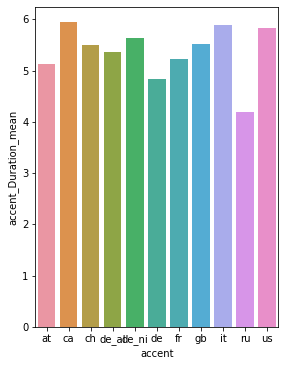

In [190]:
#plt.subplot(2,3,1)
#fig, axs = plt.subplots(2, 2, figsize=(15, 15))
#plt.legend()

# list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us','stop']
# list1=['']
# Accent_=0
# print('#'*60,'Insert Accent Loop','#'*60)
# for j in list_dataset_test_:
#   for i in range(0,11):
#     #print(i)
#     # print(onetime)
#     if j!='stop':
#       #print(f'Accent_{j}={dataset_all_accent_mean.mean_of_all_accent[i]}')
#       print(f"\n print(' Accent_{j}_Duration_mean= ')")
#       print(f"\n print({dataset_all_accent_mean.mean_of_all_accent[i]})")
#       stopcal=i+1
#       j=list_dataset_test_[stopcal]
#   if j=='stop':
#     break
#   print('#'*60,{j},{i},'#'*60)
# To show only the Accent letters ,we add neu column called accent in dataset_accent_all_Duration_mean_result
list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us','stop']

dataset_accent_all_Duration_mean_result['accent']=dataset_dataset_test_['accent']
import seaborn as sns
from matplotlib import pyplot as plt


################################## Accent AT ###########################################
# position of the figure and figure;s size 
figure_duriation_distribution_accent=plt.figure(12,figsize=(20,20))  
#plt.subplots(figure's number per column,figure's number per row)
ax_duriation_distribution_accent_at=figure_duriation_distribution_accent.add_subplot(3,4,1)

# for i in range(len(dataset_accent_all_Duration_mean_result)):
dataset_test_at['accent_Duration_mean'] = np.where(dataset_test_at['audio_filepath']!=np.NaN,5.127319, '000')

# plt.xlabel("Speaker's accent - Austria")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_at['accent_Duration_mean'],dataset_test_at['audio_filepath_numeric'], lw=3, ms=20)



ax = sns.barplot(x = 'accent', y = 'accent_Duration_mean', data = dataset_accent_all_Duration_mean_result)
 
# ################################## Accent CA ###########################################  
# ax_duriation_distribution_accent_ca=figure_duriation_distribution_accent.add_subplot(3,4,2)
# plt.xlabel("Speaker's accent - Canada")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_ca['audio_filepath_numeric'],dataset_test_ca['duration_numeric'], lw=1, ms=20)

# ################################## Accent CH ###########################################
# ax_duriation_distribution_accent_ch=figure_duriation_distribution_accent.add_subplot(343)
# plt.xlabel("Speaker's accent - China")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_ch['audio_filepath_numeric'],dataset_test_ch['duration_numeric'], lw=1, ms=20)

# ################################## Accent DE_AL ###########################################
# #plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_de_al=figure_duriation_distribution_accent.add_subplot(344)
# plt.xlabel("Speaker's accent - Deutsch AL")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_de_al['audio_filepath_numeric'],dataset_test_de_al['duration_numeric'], lw=1, ms=20)

# ################################## Accent DE_NI ###########################################
# #plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_de_ni=figure_duriation_distribution_accent.add_subplot(345)
# plt.xlabel("Speaker's accent - Deutsch NI")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_de_ni['audio_filepath_numeric'],dataset_test_de_ni['duration_numeric'], lw=1, ms=20)

# ################################## Accent DE ###########################################
# #plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_de=figure_duriation_distribution_accent.add_subplot(346)
# plt.xlabel("Speaker's accent - Deutsch")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_de['audio_filepath_numeric'],dataset_test_de['duration_numeric'], lw=1, ms=20)

# ################################## Accent FR ###########################################
# #plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_fr=figure_duriation_distribution_accent.add_subplot(347)
# plt.xlabel("Speaker's accent - France")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_fr['audio_filepath_numeric'],dataset_test_fr['duration_numeric'], lw=1, ms=20)

# ################################## Accent GB ###########################################
# #plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_gb=figure_duriation_distribution_accent.add_subplot(348)
# plt.xlabel("Speaker's accent - Great Britain")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_gb['audio_filepath_numeric'],dataset_test_gb['duration_numeric'], lw=1, ms=20)

# ################################## Accent IT ###########################################
# #plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_it=figure_duriation_distribution_accent.add_subplot(349)
# plt.xlabel("Speaker's accent - Italy")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_it['audio_filepath_numeric'],dataset_test_it['duration_numeric'], lw=1, ms=20)

# ################################## Accent RU ###########################################
# #plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_ru=figure_duriation_distribution_accent.add_subplot(3,4,10)
# plt.xlabel("Speaker's accent - Russian")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_ru['audio_filepath_numeric'],dataset_test_ru['duration_numeric'], lw=1, ms=20)

# ################################## Accent  United States of America ###########################################
# #plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_us=figure_duriation_distribution_accent.add_subplot(3,4,11)
# plt.xlabel("Speaker's accent -  United States of America")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_us['audio_filepath_numeric'],dataset_test_us['duration_numeric'], lw=1, ms=20)

# # #kurvenname = ['blau', 'orange', 'grün', 'rot', 'lila']
# # #plt.grid(True)
# plt.show()

# ############## note add the name of the plot ##Duriation Distribution of Audiofiles## to the plots

In [191]:
dataset_test_at

,audio_filepath,text,duration,duration_numeric,audio_filepath_numeric,accent_Duration_mean
0,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er ist nach eustache de saint pierre...","""duration"": 4.9}",4.9,31449916,5.127319
1,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""eine erste kleinformatige vorstudie ...","""duration"": 10.1}",10.1,19730674,5.127319
2,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er blieb ohne erfolg und lag in st\u...","""duration"": 9.0}",9.0,19703888,5.127319
3,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""mein garten ist teil eines kleingart...","""duration"": 3.7}",3.7,18507972,5.127319
4,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""was habe ich damals f\u00fcr einen u...","""duration"": 3.6}",3.6,24131267,5.127319
...,...,...,...,...,...,...
4490,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""es handelt sich heute um eine wohnst...","""duration"": 5.8}",5.8,23706817,5.127319
4491,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""wir m\u00fcssen sie blo\u00df verbes...","""duration"": 4.2}",4.2,21599214,5.127319
4492,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""unter abspaltung von wasser bildet s...","""duration"": 6.8}",6.8,25132532,5.127319
4493,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""die sammlung wurde von gro\u00dfherz...","""duration"": 5.6}",5.6,23778312,5.127319


#### Bar Diagrams 2 -Test


In [218]:
dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t')
dataset_validated_tsv

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
0,0052c07533a6976233ad5926d950b523002c4d8cdd9ae8...,common_voice_de_17922420.mp3,Zieht euch bitte draußen die Schuhe aus.,2,0,NaN,NaN,NaN,de,NaN
1,00aa59ff387a07bf1c056cccd6715b3c764201f51092c3...,common_voice_de_27060918.mp3,Es gibt auch mehrere Campingplätze.,2,0,NaN,NaN,NaN,de,NaN
2,02274179aeff73e1e7897ed6fec2355af2cd6e5410e3c6...,common_voice_de_19728810.mp3,Es kommt zum Showdown in Gstaad.,2,1,NaN,NaN,NaN,de,NaN
3,02650022b4a4266846057d97ae4d81da8af9e09e2a4bb1...,common_voice_de_19156087.mp3,Ihre Fotostrecken erschienen in Modemagazinen ...,3,1,NaN,NaN,NaN,de,NaN
4,02786062ec85038ffeed4c38ed7b31d3aa8e6439817fb1...,common_voice_de_27395829.mp3,"Aber weißt du, wer den Stein wirklich ins Roll...",2,0,NaN,NaN,NaN,de,NaN
...,...,...,...,...,...,...,...,...,...,...
793063,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911655.mp3,Gegen Bezahlung posierte sie für Fotos und gab...,3,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN
793064,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911638.mp3,Zur Folgesaison wechselte er fest in die Niede...,6,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN
793065,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911641.mp3,Er ist auf die Stile Schmetterling und Lagen s...,3,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN
793066,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911661.mp3,Vieles wurde exportiert.,6,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN


In [219]:
! pip install compare-df # install the compare-df functions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [245]:
# How to Compare Values between two Pandas DataFrames using compare_df Function
#########################################################################################################
######### We will copy a column path_numeric from df2  ==> a column audio_filepath_numeric in df2 #######
######### To have the same column name  in df1 and df2. then we apply compare_df Function in order#######
######### To make compairsion to get match the audio_filepath between df1 and df2. then we need to#######
######### copy the gender column from df2 to df1 according to the matched audio_filepath result   ####### 
################ Then plot the diagram within x=gender y=Duriation from df1  ############################
#########################################################################################################
# Plot Values Of 2 Columns From Different Datasets 
##########################################################################
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from compare_df import * # import compare-df Function

# dataset_test_at
# dataset_validated_tsv
#dataset_test_at_validated_tsv=[]
# get the audio file number and display it at dataset_validated_tsv['path_numeric']
dataset_validated_tsv['path_numeric'] = dataset_validated_tsv['path'].str[-12:-4]
dataset_validated_tsv


# delete or hide the male and NaN values from displaying at dataset_validated_tsv 
#>>>>>>>dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['gender'] == 'male') | (dataset_validated_tsv['gender'].isna())].index, inplace=True)
### or 
dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['gender'] != 'female')].index, inplace=True)
print('#'*40,' dataset_validated_tsv of females has 70087 rows × 11 columns','#'*40,)
dataset_validated_tsv
# dataset_validated_tsv['path_match']=dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['path_match'].isna())].index, inplace=True)


# dataset_test_at_validated_tsv
# dataset_test_at
# dataset_validated_tsv

#df1['gender_from_df2'] = np.where(df1['path_match_ID']== df2['path_numeric'], 'NOOOOO',df2['gender'])

########################################  dataset_validated_tsv of females has 70087 rows × 11 columns ########################################


,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment,path_numeric
26,0df96a055c391517acf584f64f74df3e5356de0c14a6c8...,common_voice_de_26888041.mp3,"Wenn nicht, dann legt man sie irgendwo hin, wo...",4,0,twenties,female,Russisch Deutsch,de,NaN,26888041
108,40160a027cb6326bb918d328bf26a291ad42e2f0718bab...,common_voice_de_19682423.mp3,Rang im Norden.,2,1,sixties,female,Schweizerdeutsch,de,NaN,19682423
552,13c8a2ea7e2181e2c7a4eaced33391eb9bdbba25e9f02e...,common_voice_de_19588153.mp3,"Das Lexikon des internationalen Films schrieb,...",2,1,twenties,female,Deutschland Deutsch,de,NaN,19588153
553,13c8a2ea7e2181e2c7a4eaced33391eb9bdbba25e9f02e...,common_voice_de_19588191.mp3,Es gilt als eines der letzten „unberührten“ ma...,2,1,twenties,female,Deutschland Deutsch,de,NaN,19588191
654,387b600e39604ec5cdafca21773d84f20f9868334c5fd5...,common_voice_de_19588626.mp3,"Sie ist gelblich, rötlich oder bräunlich gefärbt.",2,0,thirties,female,Türkisch Deutsch,de,NaN,19588626
...,...,...,...,...,...,...,...,...,...,...,...
583856,49d9f280f7065108b706083ca7efa6e3341a7ecd382b65...,common_voice_de_28741915.mp3,"Mell gehörte keinem literarischen Zirkel an, i...",2,0,fifties,female,Deutschland Deutsch,de,NaN,28741915
583857,49d9f280f7065108b706083ca7efa6e3341a7ecd382b65...,common_voice_de_28741916.mp3,"Ähnliche Verordnungen gibt es für Nordirland, ...",2,0,fifties,female,Deutschland Deutsch,de,NaN,28741916
583858,49d9f280f7065108b706083ca7efa6e3341a7ecd382b65...,common_voice_de_28741917.mp3,Daher sind sie weich wie Watte.,2,1,fifties,female,Deutschland Deutsch,de,NaN,28741917
583859,49d9f280f7065108b706083ca7efa6e3341a7ecd382b65...,common_voice_de_28741918.mp3,Es gibt einen dritten und noch wichtigeren Punkt.,2,0,fifties,female,Deutschland Deutsch,de,NaN,28741918


In [246]:
dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['gender'] != 'female') | (dataset_validated_tsv['gender'].isna())| (dataset_validated_tsv['accents'].isna())].index, inplace=True)
dataset_validated_tsv 

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment,path_numeric
26,0df96a055c391517acf584f64f74df3e5356de0c14a6c8...,common_voice_de_26888041.mp3,"Wenn nicht, dann legt man sie irgendwo hin, wo...",4,0,twenties,female,Russisch Deutsch,de,NaN,26888041
108,40160a027cb6326bb918d328bf26a291ad42e2f0718bab...,common_voice_de_19682423.mp3,Rang im Norden.,2,1,sixties,female,Schweizerdeutsch,de,NaN,19682423
552,13c8a2ea7e2181e2c7a4eaced33391eb9bdbba25e9f02e...,common_voice_de_19588153.mp3,"Das Lexikon des internationalen Films schrieb,...",2,1,twenties,female,Deutschland Deutsch,de,NaN,19588153
553,13c8a2ea7e2181e2c7a4eaced33391eb9bdbba25e9f02e...,common_voice_de_19588191.mp3,Es gilt als eines der letzten „unberührten“ ma...,2,1,twenties,female,Deutschland Deutsch,de,NaN,19588191
654,387b600e39604ec5cdafca21773d84f20f9868334c5fd5...,common_voice_de_19588626.mp3,"Sie ist gelblich, rötlich oder bräunlich gefärbt.",2,0,thirties,female,Türkisch Deutsch,de,NaN,19588626
...,...,...,...,...,...,...,...,...,...,...,...
583856,49d9f280f7065108b706083ca7efa6e3341a7ecd382b65...,common_voice_de_28741915.mp3,"Mell gehörte keinem literarischen Zirkel an, i...",2,0,fifties,female,Deutschland Deutsch,de,NaN,28741915
583857,49d9f280f7065108b706083ca7efa6e3341a7ecd382b65...,common_voice_de_28741916.mp3,"Ähnliche Verordnungen gibt es für Nordirland, ...",2,0,fifties,female,Deutschland Deutsch,de,NaN,28741916
583858,49d9f280f7065108b706083ca7efa6e3341a7ecd382b65...,common_voice_de_28741917.mp3,Daher sind sie weich wie Watte.,2,1,fifties,female,Deutschland Deutsch,de,NaN,28741917
583859,49d9f280f7065108b706083ca7efa6e3341a7ecd382b65...,common_voice_de_28741918.mp3,Es gibt einen dritten und noch wichtigeren Punkt.,2,0,fifties,female,Deutschland Deutsch,de,NaN,28741918


In [242]:
for i in range(len(dataset_test_at)):
  dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['gender'] != 'female')].index, inplace=True)
  for j in range(len(dataset_validated_tsv)):
    a=0
    b=0
    # a=dataset_validated_tsv['path_numeric'].in
    # b=dataset_test_at.audio_filepath_numeric[i]
    if a==b and i<2:
      print('#'*100,{i,j})
      # dataset_test_at.female[i]=='female'
      # in the future will the founded row extract a way from the next search to improve the performance and  reduce the search time
      #dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['gender'] != 'female')].index, inplace=True)
      #drop 0 -i
      b=b+1
      a=a+1
    else:
      break
# dataset_test_at['female'] 

Streaming output truncated to the last 5000 lines.
#################################################################################################### {1, 43905}
#################################################################################################### {1, 43906}
#################################################################################################### {1, 43907}
#################################################################################################### {1, 43908}
#################################################################################################### {1, 43909}
#################################################################################################### {1, 43910}
#################################################################################################### {1, 43911}
#################################################################################################### {43912, 1}
#####################################################

KeyboardInterrupt: ignored

In [232]:
dataset_test_at

,audio_filepath,text,duration,duration_numeric,audio_filepath_numeric,accent_Duration_mean
0,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er ist nach eustache de saint pierre...","""duration"": 4.9}",4.9,31449916,5.127319
1,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""eine erste kleinformatige vorstudie ...","""duration"": 10.1}",10.1,19730674,5.127319
2,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er blieb ohne erfolg und lag in st\u...","""duration"": 9.0}",9.0,19703888,5.127319
3,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""mein garten ist teil eines kleingart...","""duration"": 3.7}",3.7,18507972,5.127319
4,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""was habe ich damals f\u00fcr einen u...","""duration"": 3.6}",3.6,24131267,5.127319
...,...,...,...,...,...,...
4490,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""es handelt sich heute um eine wohnst...","""duration"": 5.8}",5.8,23706817,5.127319
4491,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""wir m\u00fcssen sie blo\u00df verbes...","""duration"": 4.2}",4.2,21599214,5.127319
4492,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""unter abspaltung von wasser bildet s...","""duration"": 6.8}",6.8,25132532,5.127319
4493,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""die sammlung wurde von gro\u00dfherz...","""duration"": 5.6}",5.6,23778312,5.127319


In [ ]:
# How to Compare Values between two Pandas DataFrames using compare_df Function
#########################################################################################################
######### We will copy a column path_numeric from df2  ==> a column audio_filepath_numeric in df2 #######
######### To have the same column name  in df1 and df2. then we apply compare_df Function in order#######
######### To make compairsion to get match the audio_filepath between df1 and df2. then we need to#######
######### copy the gender column from df2 to df1 according to the matched audio_filepath result   ####### 
################ Then plot the diagram within x=gender y=Duriation from df1  ############################
#########################################################################################################
# Plot Values Of 2 Columns From Different Datasets 
##########################################################################
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from compare_df import * # import compare-df Function

# df1 refers to dataset_test_at
# df2 refers to dataset_validated_tsv

data_1 = {'product_1': ['computer','monitor','printer','desk','router'],
                   'audio_filepath_numeric': [1200,999,200,2050,350],'duration_numeric':[4.9,10.1,9.0,3.7,3.13]
                   }
df1 = pd.DataFrame(data_1)

print('*********************print (df1)**********************')
print(df1)

data_2 = {'product_2': ['computer','monitor','printer','desk','router','Keyboard','mouse'],
                    'path_numeric': [1200,800,300,150,2050,999,111],'gender': ['male','female','female','male','male','female','male']
                    }
df2 = pd.DataFrame(data_2)


df2['audio_filepath_numeric']=df2['path_numeric']
print('*********************print  df2**********************')
print(df2)

# Here we Compare Values between two Pandas DataFrames df1 and df2
# It will return the audio_filepath_numeric if it is exists in both df1 and df2 otherwise it will return  NaN
#####################################################
df1["path_match_ID"]=getMatchingRecords(df1,df2,common_columns=['audio_filepath_numeric'])
print('*********************print Contents of (df1)****path_match_ID******************')
print(df1)
print('*******************print (df1.info())************************')
print(df1.info())

print('*******************print Labels************************')

# for  label2, content2 in  df2.items():
for label2, content2 in  df2.items():
  print('*******************print label1************************')
  # df1['gender_from_df2'] = np.where(df1['path_match_ID']== df2['path_numeric'], 'NOOOOO',df2['gender'])
  df1['gender_from_df2'] = np.where(df1['path_match_ID']== df2['path_numeric'], 'NOOOOO',df2['gender'])
  #print(f'label: {content2}')
  #print('*'*60)
    # print(f'label: {label2}')
    # print('*******************print label2************************')
    # print('*'*60)
    #print(f'content: {content}', sep='\n')

# print('*********************print Contents**********************')

# for label, content in df2.items():
#     #print(f'label: {label}')
#     print(f'content: {content}', sep='\n')


# print('*********************print Contents**********************')

# for label, content in df2.items():
#     #print(f'label: {label}')
#     print(f'content: {content}', sep='\n')

# dataset.drop(dataset[(dataset['VQ'] < 1) | (dataset['VF'] < 1)|(dataset['VU'] < 1)|(dataset['VD'] < 1)].index, inplace=True)



####df1['audio_filepath_numeric'] == df2['path_numeric']


# df1['gender_from_df2'] = np.where(df1['path_match_ID']== df2['path_numeric'], 'NOOOOO',df2['gender'])

# print('*********************print Contents of (df1)**********************')
# print(df1)
# df1['gender_from_df2'] = np.where(df1['path_match_ID'].isna(), np.nan,df2['gender']) #create a new column call gender_from_df2 in df1 to check if prices match
# print('*********************print Contents of df1.info()**********************')

# print(df1.info())
# print('*********************print Contents of path_match**********************')

# print(df1)


# #df1['path_match']=df1.drop(df1[(df1['path_match'].isna())].index, inplace=True)

# print('*********************print Contents of gender_match**********************')

 
# df1['gender_match'] = np.where(df1['audio_filepath_numeric'] == df2['path_numeric'], df2['gender'], np.nan) #create a new column in df1 for path diff

# print(df1)
# print('*********************print Contents of gender_from_df2**********************')

# #df1['path_numeric'] = df2['path_numeric'] #add the path_numeric column from df2 to df1
# df1['path_match'] = np.where(df1['audio_filepath_numeric'] == df2['path_numeric'], 'True', 'False') #create a new column in df1 to check if prices match
# print('*********************print Contents of df1.info()**********************')

# print(df1.info())
# print('*********************print Contents of path_match**********************')

# print(df1)


# #df1['path_match']=df1.drop(df1[(df1['path_match'].isna())].index, inplace=True)

# print('*********************print Contents of gender_match**********************')

 
# df1['gender_match'] = np.where(df1['audio_filepath_numeric'] == df2['path_numeric'], df2['gender'], np.nan) #create a new column in df1 for path diff

# print(df1)
# print('*********************print Contents of gender_from_df2**********************')



# ###df1['gender_from_df2'] = np.where(df1['gender_match'].isna(),, df1['gender_match']) #create a new column in df1 for path diff
# ###df1['gender_from_df2']=df1.drop(df1[(df1['gender_match'].isna())].index, inplace=True)
 

# # Hide NaN values from display
# print('*********************print Contents of gender_from_df2**********************')
# df1.drop(df1[(df1['gender_match'].isna())].index, inplace=True)
# df1['gender_from_df2']=df1['gender_match']
#  #create a new column in df1 for path diff
# print(df1)
####print(df1[df1["path_match_ID"].map(lambda path_match: "True" in path_match)])

# plt.xlabel("gender")
# plt.ylabel("duration_numeric")
# plt.plot(df1['gender_match'],df1['duration_numeric'], lw=1, ms=20)

# # #kurvenname = ['blau', 'orange', 'grün', 'rot', 'lila']
# # #plt.grid(True)
# plt.show()

In [ ]:
print(dataset_test_at['duration(numeric)'].describe())
#print(dataset_test_at['duration(numeric)'].describe(mean))

#### **Duration distribution of audiofiles per speaker's gender. both as a plot and in terms of mean and variance.**

In [ ]:
################################## Gender ###########################################
print('################################## Gender ###########################################')
 # Duration distribution of audiofiles per speaker's gender

import re # import the library of research about special value in String 

# add Columns Names to the Dataset: header=None, names=['audio_filepath','text','duration']
dataset_test_at = pd.read_csv('test_at.txt', header=None, names=['audio_filepath','text','duration'])
dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t')

# extract the numeric values of the durations from the third Column and store it in a new column called duration(numeric)
dataset_test_at['duration(numeric)'] = dataset_test_at['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_at['duration(numeric)'] =dataset_test_at['duration(numeric)'].div(10)


# extract the audio files number's values from the second Column and store it in a new column called duration_numeric
dataset_validated_tsv['path_numeric'] = dataset_validated_tsv['path'].str[-12:-4]
dataset_test_at['audio_filepath_numeric'] = dataset_test_at['audio_filepath'].str[-13:-5]


#Comparing two dataframes and getting the simpliers [equal Audiofiles Number from both datasets]
#dataset_test_at['path_numeric'] = dataset_validated_tsv['path_numeric'] #add the path_numeric column from dataset_validated_tsv to dataset_test_at
print('*********************print Contents of dataset_test_at.info()**********************')

print(dataset_test_at.info())
print('*********************print Contents of dataset_test_at**********************')

print(dataset_test_at)
print('*********************print Contents of dataset_validated_tsv.info()**********************')

print(dataset_validated_tsv.info())
print('*********************print Contents of dataset_test_at**********************')

print(dataset_validated_tsv)
print('****************************************************************************')

##############################################################################
#create a new column in dataset_test_at to show the result of matching the path
dataset_test_at['path_match'] = np.where(dataset_test_at['audio_filepath_numeric'] == dataset_validated_tsv['path_numeric'], 'True', 'False') 
print('*********************print Contents of dataset_test_at.info()**********************')

print(dataset_test_at.info())
print('*********************print Contents of path_match**********************')

print(dataset_test_at)


#dataset_test_at['path_match']=dataset_test_at.drop(dataset_test_at[(dataset_test_at['path_match'].isna())].index, inplace=True)

print('*********************print Contents of gender_match**********************')

 #create a new column in dataset_test_at for path diff
dataset_test_at['gender_match'] = np.where(dataset_test_at['audio_filepath_numeric'] == dataset_validated_tsv['path_numeric'], dataset_validated_tsv['gender'], np.nan) 
print(dataset_test_at)
print('*********************print Contents of gender_from_dataset_validated_tsv**********************')


###dataset_test_at['gender_from_dataset_validated_tsv'] = np.where(dataset_test_at['gender_match'].isna(),, dataset_test_at['gender_match']) #create a new column in dataset_test_at for path diff
###dataset_test_at['gender_from_dataset_validated_tsv']=dataset_test_at.drop(dataset_test_at[(dataset_test_at['gender_match'].isna())].index, inplace=True)

# # delete gender NaN Values from the result

# # delete duration NaN Values from the result
 
# Hide NaN values from the displayed result
print('*********************print Contents of gender_from_dataset_validated_tsv**********************')
dataset_test_at.drop(dataset_test_at[(dataset_test_at['gender_match'].isna())].index, inplace=True)
dataset_test_at['gender_from_dataset_validated_tsv']=dataset_test_at['gender_match']
 #create a new column in dataset_test_at for path diff
print(dataset_test_at)
#print(dataset_test_at[dataset_test_at["path_match_ID"].map(lambda path_match: "True" in path_match)])

plt.xlabel("Gender")
plt.ylabel("duration_numeric")
plt.plot(dataset_test_at['gender_match'],dataset_test_at['duration_numeric'], lw=1, ms=20)

# #kurvenname = ['blau', 'orange', 'grün', 'rot', 'lila']
# #plt.grid(True)
plt.show()

In [ ]:
# How to Compare Values between two Pandas DataFrames
#####################################################

# Plot Values Of 2 Columns From Different Datasets 
##########################################################################
# exp
##########################################################################
import pandas as pd
import numpy as np
data_1 = {'product_1': ['computer','monitor','printer','desk','router'],
                   'audio_filepath_numeric': [1200,800,200,350,2050],'duration_numeric':[4.9,10.1,9.0,3.7,3.13]
                   }
df1 = pd.DataFrame(data_1)

print('*********************print Contents of (df1)**********************')
print(df1)

data_2 = {'product_2': ['computer','monitor','printer','desk','router'],
                    'path_numeric': [1200,800,300,150,2050],'gender': ['male','female','female','male','male']
                    }
df2 = pd.DataFrame(data_2)

print('*********************print Contents of (df2)**********************')
print(df2)
# df1['new column that will contain the comparison results'] = np.where(condition,'value if true','value if false')
# df1['path_match'] = np.where(df1['audio_filepath_numeric'] == df2['path_numeric'], 'True', 'False')
########################################################

df1['path_numeric'] = df2['path_numeric'] #add the path_numeric column from df2 to df1
df1['path_match'] = np.where(df1['audio_filepath_numeric'] == df2['path_numeric'], 'True', 'False') #create a new column in df1 to check if prices match
print('*********************print Contents of df1.info()**********************')

print(df1.info())
print('*********************print Contents of path_match**********************')

print(df1)


#df1['path_match']=df1.drop(df1[(df1['path_match'].isna())].index, inplace=True)

print('*********************print Contents of gender_match**********************')

 
df1['gender_match'] = np.where(df1['audio_filepath_numeric'] == df2['path_numeric'], df2['gender'], np.nan) #create a new column in df1 for path diff

print(df1)
print('*********************print Contents of gender_from_df2**********************')


###df1['gender_from_df2'] = np.where(df1['gender_match'].isna(),, df1['gender_match']) #create a new column in df1 for path diff
###df1['gender_from_df2']=df1.drop(df1[(df1['gender_match'].isna())].index, inplace=True)

# Hide NaN values from display
print('*********************print Contents of gender_from_df2**********************')
df1.drop(df1[(df1['gender_match'].isna())].index, inplace=True)
df1['gender_from_df2']=df1['gender_match']
 #create a new column in df1 for path diff
print(df1)
#print(df1[df1["path_match_ID"].map(lambda path_match: "True" in path_match)])

plt.xlabel("Gender")
plt.ylabel("duration_numeric")
plt.plot(df1['gender_match'],df1['duration_numeric'], lw=1, ms=20)

# #kurvenname = ['blau', 'orange', 'grün', 'rot', 'lila']
# #plt.grid(True)
plt.show()


In [ ]:
#plt.subplot(2,3,1)
#fig, axs = plt.subplots(2, 2, figsize=(15, 15))
#plt.legend()


# position of the figure and figure;s size 
plt.figure(1,(10,15))  

#plt.subplots(figure's number per column,figure's number per row)
# plt.subplots(3,4)

plt.xlabel("Speaker's accent - Austria")
plt.ylabel("Duriation Distribution of Audiofiles")
plt.plot(dataset_test_at['audio_filepath_numeric'],dataset_test_at['duration_numeric'], lw=1, ms=20)

#kurvenname = ['blau', 'orange', 'grün', 'rot', 'lila']
plt.grid(True)
plt.show()

## <font color="1497d4">  **Running a Basic Emformer Training**</font>

 


## <font color="1497d4">  **Accented Speech Recognition - Speech Repo**</font>

<font color=white> **speech recognition @ voize**</font> 

## <font color="1497d4">  **Development Workflow**</font>
 
<font color=white> **Setup dev environment:**</font> 


 



HelloWorld

pytorch/android-demo-app

#### 1. Model Preparation


In [ ]:
 !pip install torch torchvision
 

To serialize and optimize the model for Android, you can use the Python script in the root folder of HelloWorld app:



In [ ]:
import shutil

shutil.rmtree('/content/drive/MyDrive/QU-DFKI-Thesis-ASR/Emformer-training/app', ignore_errors=True)
shutil.rmtree('/content/drive/MyDrive/QU-DFKI-Thesis-ASR/Pytroch', ignore_errors=True)

  # import os
 # os.rmdir('/content/drive/MyDrive/QU-DFKI-Thesis-ASR/Emformer-training/app/src/main/assets')

In [ ]:

import torch
import torchvision
from torch.utils.mobile_optimizer import optimize_for_mobile
import os

model = torchvision.models.mobilenet_v3_small(pretrained=True)
model.eval()
example = torch.rand(1, 3, 224, 224)
traced_script_module = torch.jit.trace(model, example)
optimized_traced_model = optimize_for_mobile(traced_script_module)

os.makedirs('/content/drive/MyDrive/QU-DFKI-Thesis-ASR/Emformer-training/app/src/main/assets')
optimized_traced_model._save_for_lite_interpreter("/content/drive/MyDrive/QU-DFKI-Thesis-ASR/Emformer-training/app/src/main/assets/model.pt")

If everything works well, we should have our scripted and optimized model - model.pt generated in the assets folder of android application. That will be packaged inside android application as asset and can be used on the device.

By using the new MobileNet v3 model instead of the old Resnet18 model, and by calling the optimize_for_mobile method on the traced model, the model inference time on a Pixel 3 gets decreased from over 230ms to about 40ms.

More details about TorchScript you can find in tutorials on pytorch.org

 #### 2. Cloning from github

In [ ]:
# os.makedirs('/content/drive/MyDrive/QU-DFKI-Thesis-ASR/Pytroch') 
!git clone https://github.com/pytorch/android-demo-app.git
! https://gitlab.com/voize-gmbh/machine-learning/speech.git

In [ ]:
!cd /content/android-demo-app/HelloWorldApp

In [ ]:
!ls
!./gradlew installDebug

In [ ]:
 os.makedirs('/content/drive/MyDrive/QU-DFKI-Thesis-ASR/Pytroch') 

In [ ]:
shutil.rmtree('/content/drive/MyDrive/QU-DFKI-Thesis-ASR/Pytroch', ignore_errors=True)


## <font color="1497d4">  **Running a Basic Emformer Training**</font>

 


## <font color="1497d4">  **Accented Speech Recognition - Speech Repo**</font>

<font color=white> **speech recognition @ voize**</font> 

## <font color="1497d4">  **Development Workflow**</font>
 
<font color=white> **Setup dev environment:**</font> 


 

In [ ]:
import shutil

shutil.rmtree('/c\ontent/venv', ignore_errors=True)

In [ ]:
!git clone git@gitlab.com:voize-gmbh/machine-learning/speech.git

In [ ]:
# python
!python3 -m venv venv
!source /content/venv/bin/activate
!pip3 install -U pip
!pip3 install torch==1.12.0+cu113 torchaudio==0.12.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
!pip3 install -r requirements.txt
import os
os.makedirs('/content/venv/scripts')
! ./scripts/install_voize_deps.sh

# yarn (git hooks)
!yarn


In [ ]:
import os
cd /content/venv
os.makedirs('/scripts')
! ./scripts/install_voize_deps.sh

# yarn (git hooks)
!yarn

In [ ]:
# open new shell in docker container
make shell

# start training
make run mode=train task=rnnt config=emformer-41m-pretraining

# debugging
#  run training, then use "Python: Remote Attach" debug config in VSCode
make run-debug mode=train task=rnnt config=emformer-41m-pretraining


emformer

In [ ]:
# single gpu training in debug mode (repl on exception)
./run.sh train -m emformer --gpu cuda:0 --debug

# multi gpu training
./run.sh train -m emformer --distributed


##Training efficiency

Measured on common-voice-de 6.1 (based on commit bff9e3f9afcb3893451f4d52ecf811f32c8ff59d):



In [ ]:
* gpu=v100    gpus=1 accum=1  batch_max_score_limit=1_000_000 data=100% |  2.90it/s, ~1:37:00/epoch
* gpu=rtx3090 gpus=2 accum=1  batch_max_score_limit=1_000_000 data=25%  |  4.90it/s,    47:39/epoch
* gpu=rtx3090 gpus=2 accum=16 batch_max_score_limit=1_000_000 data=25%  | 14.19it/s,    19:19/epoch 
* gpu=rtx3090 gpus=2 accum=4  batch_max_score_limit=2_000_000 data=10%  |  5.68it/s,     7:08/epoch 
* gpu=rtx3090 gpus=2 accum=8  batch_max_score_limit=2_500_000 data=10%  |  5.99it/s,     5:14/epoch  (memory maxxed out)
* gpu=rtx3090 gpus=2 accum=16 batch_max_score_limit=2_500_000 data=25%  |  7.82it/s,    13:05/epoch  (memory maxxed out)
* gpu=v100    gpus=8 accum=16 batch_max_score_limit=1_000_000 data=100% |  it/s,    /epoch  (memory maxxed out)


Measured on common-voice-de 6.1 concatenated with multilingual-librispeech-de (some data dropped):



In [ ]:
* gpu=v100    gpus=8 accum=64 batch_max_score_limit=1_250_000 data=100% |  4.11it/s, ~1:14:00/epoch  (no DataLoader fixes)
* gpu=v100    gpus=8 accum=64 batch_max_score_limit=1_250_000 data=100% |  4.11it/s, ~1:14:00/epoch  (DataLoader fixes applied)
* gpu=v100    gpus=1 accum=64 batch_max_score_limit=1_250_000 data=100% |  4.45it/s, ~9:25:00/epoch
* gpu=v100    gpus=1 accum=64 batch_max_score_limit=1_250_000 data=100% |  4.36it/s, ~9:25:00/epoch  (model jit scripted)


 ## Statistical Analysis for Accented Speech recognition
 ## Mozilla Common Voice 10.0. dataset download 
 

